In [94]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Image
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Checking the number of images and reports we have

In [ ]:

# X-ray Image location
Xray_loc = r'/content/drive/MyDrive/Project Data/NLMCXR_png'
rep_loc = r'/content/drive/MyDrive/Project Data/ecgen-radiology'
count1 = 0
count2= 0 
# Iterating the image folder
for item in os.listdir(Xray_loc):
    if os.path.isfile(os.path.join(Xray_loc, item)):
        count1 += 1
# Iterating the reports folder
for rep in os.listdir(rep_loc):
    if os.path.isfile(os.path.join(rep_loc, rep)):
        count2 += 1   
print('Number of X-Ray Images:', count1)
print('Number of reports:', count2)

Number of X-Ray Images: 7471
Number of reports: 3955


### Since we see that there are more images than reports, we can say that there is more than 1 X ray Image associated with a report #

### Basic format of a report is as follows:

In [ ]:
with open(r'/content/drive/MyDrive/Project Data/ecgen-radiology/1067.xml') as x:
    data = x.read()
    print(data)

<?xml version="1.0" encoding="utf-8"?>
<eCitation>
   <meta type="rr"/>
   <uId id="CXR1067"/>
   <pmcId id="1067"/>
   <docSource>CXR</docSource>
   <IUXRId id="1067"/>
   <licenseType>open-access</licenseType>
   <licenseURL>http://creativecommons.org/licenses/by-nc-nd/4.0/</licenseURL>
   <ccLicense>byncnd</ccLicense>
   <articleURL/>
   <articleDate>2013-08-01</articleDate>
   <articleType>XR</articleType>
   <publisher>Indiana University</publisher>
   <title>Indiana University Chest X-ray Collection</title>
   <note>The data are drawn from multiple hospital systems.</note>
   <specialty>pulmonary diseases</specialty>
   <subset>CXR</subset>
   <MedlineCitation Owner="Indiana University" Status="supplied by publisher">
   
      <Article PubModel="Electronic">
      
         <Journal>
         
            <JournalIssue>
            
               <PubDate>
               
                  <Year>2013</Year>
               
                  <Month>08</Month>
               
   

In [ ]:

start = open(r"/content/drive/MyDrive/Project Data/ecgen-radiology/1067.xml")
cursor = start.read()
search = BeautifulSoup(cursor,'xml')
heads = search.find_all('AbstractText')
uid = search.find_all('uId')
for title in heads:
    c = heads[1].get_text() 
print(c)
num = uid[0]
id = str(num)
uniq = id[9:-3]
print(uniq)
    

XXXX-year-old male with chest pain
CXR1067


In [ ]:
t= 'CXR102_IM-0016-2001.png'
print(t.split('_')[0])

CXR102


In [ ]:
df = pd.DataFrame(columns=['Patient_ID','Image_file','Temporary'])
for filename in os.listdir(r'/content/drive/MyDrive/Project Data/NLMCXR_png'):
    dict1 = {'Patient_ID':filename.split('_')[0],'Image_file':filename,'Temporary':filename.split('_')[0][3:]}
    df = df.append(dict1, ignore_index = True)
df.drop(df.loc[df['Patient_ID']=='Thumbs.db'].index, inplace=True)
df.Temporary = pd.to_numeric(df.Temporary, errors='coerce')
df= df.sort_values('Temporary')
df = df.reset_index(drop=True)
df = df.drop('Temporary', axis=1)
print(df) 

     Patient_ID                Image_file
0          CXR1   CXR1_1_IM-0001-4001.png
1          CXR1   CXR1_1_IM-0001-3001.png
2          CXR2     CXR2_IM-0652-1001.png
3          CXR2     CXR2_IM-0652-2001.png
4          CXR3     CXR3_IM-1384-1001.png
...         ...                       ...
7465    CXR3997  CXR3997_IM-2048-1002.png
7466    CXR3998  CXR3998_IM-2048-1002.png
7467    CXR3998  CXR3998_IM-2048-1001.png
7468    CXR3999  CXR3999_IM-2049-2001.png
7469    CXR3999  CXR3999_IM-2049-1001.png

[7470 rows x 2 columns]


In [ ]:
df['Patient_ID'].value_counts()

CXR1303    5
CXR3965    4
CXR1102    4
CXR3566    4
CXR846     4
          ..
CXR560     1
CXR2205    1
CXR334     1
CXR3654    1
CXR2496    1
Name: Patient_ID, Length: 3851, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


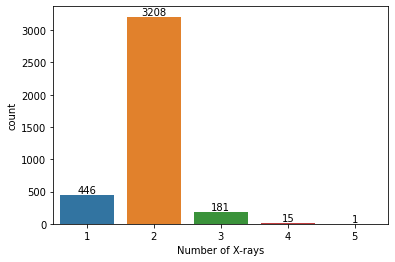

In [ ]:
cplot = sns.countplot(df['Patient_ID'].value_counts())
for container in cplot.containers:
    cplot.bar_label(container)
cplot.set(xlabel='Number of X-rays')
plt.show()

### As we see from the countplot above that most of the patients have 2 X-Ray Images. This is the benchmark that we will carry forward. Therefore any patient that has:
1. 1 X-ray Image, the same will be copied and considered as the 2nd X-Ray Image
2. More than 2 X-ray images, randomly 2 will be considered and the others deleted.

In [ ]:
img_4= df['Patient_ID'].value_counts()[df['Patient_ID'].value_counts()==4].index.tolist()
img_4

['CXR3965',
 'CXR1102',
 'CXR3566',
 'CXR846',
 'CXR3468',
 'CXR3307',
 'CXR2097',
 'CXR1525',
 'CXR3359',
 'CXR2280',
 'CXR2084',
 'CXR2560',
 'CXR3932',
 'CXR1015',
 'CXR2243']

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3307']

6142    CXR3307
6143    CXR3307
6144    CXR3307
6145    CXR3307
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3932']

7332    CXR3932
7333    CXR3932
7334    CXR3932
7335    CXR3932
Name: Patient_ID, dtype: object

In [ ]:
for img in img_4:
    lst4=df['Patient_ID'][df['Patient_ID']==img].index.tolist()
    if len(lst4)>2:
        for i in range(0,2):
            random.seed(2000)
            del4=random.choice(lst4)
            lst4.remove(del4)
            df = df.drop(index=del4)



In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3307']

6142    CXR3307
6144    CXR3307
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3932']

7332    CXR3932
7334    CXR3932
Name: Patient_ID, dtype: object

In [ ]:
img_5= df['Patient_ID'].value_counts()[df['Patient_ID'].value_counts()==5].index.tolist()
img_5

['CXR1303']

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR1303']

2426    CXR1303
2427    CXR1303
2428    CXR1303
2429    CXR1303
2430    CXR1303
Name: Patient_ID, dtype: object

In [ ]:
for img in img_5:
    lst5=df['Patient_ID'][df['Patient_ID']==img].index.tolist()
    if len(lst5)>2:
        for i in range(0,3):
            random.seed(2000)
            del5=random.choice(lst5)
            lst5.remove(del5)
            df = df.drop(index=del5)

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR1303']

2426    CXR1303
2428    CXR1303
Name: Patient_ID, dtype: object

In [ ]:
img_3= df['Patient_ID'].value_counts()[df['Patient_ID'].value_counts()==3].index.tolist()
img_3

['CXR2425',
 'CXR1523',
 'CXR2398',
 'CXR2397',
 'CXR1500',
 'CXR3509',
 'CXR3521',
 'CXR1521',
 'CXR3532',
 'CXR1536',
 'CXR626',
 'CXR3549',
 'CXR3551',
 'CXR423',
 'CXR2338',
 'CXR2336',
 'CXR3570',
 'CXR2321',
 'CXR3495',
 'CXR1478',
 'CXR2433',
 'CXR510',
 'CXR2539',
 'CXR3362',
 'CXR1375',
 'CXR3375',
 'CXR1389',
 'CXR587',
 'CXR3390',
 'CXR1402',
 'CXR573',
 'CXR1420',
 'CXR3419',
 'CXR2470',
 'CXR3444',
 'CXR519',
 'CXR1459',
 'CXR2308',
 'CXR372',
 'CXR2266',
 'CXR261',
 'CXR251',
 'CXR2146',
 'CXR1720',
 'CXR2145',
 'CXR233',
 'CXR227',
 'CXR220',
 'CXR1733',
 'CXR212',
 'CXR210',
 'CXR3797',
 'CXR3809',
 'CXR1768',
 'CXR3819',
 'CXR170',
 'CXR2169',
 'CXR2177',
 'CXR1610',
 'CXR3716',
 'CXR3637',
 'CXR346',
 'CXR2256',
 'CXR335',
 'CXR1633',
 'CXR1638',
 'CXR1643',
 'CXR3671',
 'CXR2231',
 'CXR304',
 'CXR2218',
 'CXR1677',
 'CXR2194',
 'CXR282',
 'CXR3709',
 'CXR2543',
 'CXR1358',
 'CXR163',
 'CXR3076',
 'CXR2829',
 'CXR1101',
 'CXR1104',
 'CXR3058',
 'CXR2817',
 'CXR901',
 

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR62']

120    CXR62
121    CXR62
122    CXR62
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR1260']

2349    CXR1260
2350    CXR1260
2351    CXR1260
Name: Patient_ID, dtype: object

In [ ]:
for img in img_3:
    lst3=df['Patient_ID'][df['Patient_ID']==img].index.tolist()
    if len(lst3)>2:
        for i in range(0,1):
            random.seed(2000)
            del3=random.choice(lst3)
            lst3.remove(del3)
            df = df.drop(index=del3)

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR62']

120    CXR62
122    CXR62
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR1260']

2349    CXR1260
2351    CXR1260
Name: Patient_ID, dtype: object

In [ ]:
img_1= df['Patient_ID'].value_counts()[df['Patient_ID'].value_counts()==1].index.tolist()
img_1

['CXR3812',
 'CXR2035',
 'CXR3824',
 'CXR954',
 'CXR3822',
 'CXR953',
 'CXR1064',
 'CXR2025',
 'CXR1338',
 'CXR949',
 'CXR3353',
 'CXR1059',
 'CXR1336',
 'CXR589',
 'CXR956',
 'CXR1062',
 'CXR646',
 'CXR3356',
 'CXR647',
 'CXR2488',
 'CXR44',
 'CXR691',
 'CXR1757',
 'CXR1120',
 'CXR3270',
 'CXR1764',
 'CXR137',
 'CXR1856',
 'CXR1761',
 'CXR2409',
 'CXR1039',
 'CXR144',
 'CXR1408',
 'CXR3839',
 'CXR157',
 'CXR3838',
 'CXR147',
 'CXR1897',
 'CXR3343',
 'CXR3834',
 'CXR2737',
 'CXR1129',
 'CXR690',
 'CXR3237',
 'CXR597',
 'CXR175',
 'CXR2717',
 'CXR3805',
 'CXR2971',
 'CXR198',
 'CXR3776',
 'CXR2967',
 'CXR1331',
 'CXR2705',
 'CXR203',
 'CXR204',
 'CXR1872',
 'CXR3769',
 'CXR206',
 'CXR1427',
 'CXR3284',
 'CXR1159',
 'CXR1705',
 'CXR1328',
 'CXR214',
 'CXR2816',
 'CXR1430',
 'CXR216',
 'CXR2697',
 'CXR2071',
 'CXR1880',
 'CXR1714',
 'CXR196',
 'CXR586',
 'CXR936',
 'CXR178',
 'CXR2746',
 'CXR3801',
 'CXR1147',
 'CXR1421',
 'CXR2392',
 'CXR2959',
 'CXR1150',
 'CXR1724',
 'CXR3793',
 'CXR17

In [ ]:
y=df['Patient_ID'][df['Patient_ID']=='CXR3023'].index

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR1283'].index[0]


2395

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR671']

1256    CXR671
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3822']

7127    CXR3822
Name: Patient_ID, dtype: object

In [ ]:
df.loc[7127][0]

'CXR3822'

In [ ]:
for img in img_1:
    idx = df['Patient_ID'][df['Patient_ID']==img].index[0]
    df.loc[idx+0.5] = [df.loc[idx][0], df.loc[idx][1]]
    df = df.sort_index().reset_index(drop=True)

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR671']

1304    CXR671
1305    CXR671
Name: Patient_ID, dtype: object

In [ ]:
df['Patient_ID'][df['Patient_ID']=='CXR3822']

7354    CXR3822
7355    CXR3822
Name: Patient_ID, dtype: object

In [ ]:
df

,Patient_ID,Image_file
0,CXR1,CXR1_1_IM-0001-4001.png
1,CXR1,CXR1_1_IM-0001-3001.png
2,CXR2,CXR2_IM-0652-1001.png
3,CXR2,CXR2_IM-0652-2001.png
4,CXR3,CXR3_IM-1384-1001.png
...,...,...
7697,CXR3997,CXR3997_IM-2048-1002.png
7698,CXR3998,CXR3998_IM-2048-1002.png
7699,CXR3998,CXR3998_IM-2048-1001.png
7700,CXR3999,CXR3999_IM-2049-2001.png


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


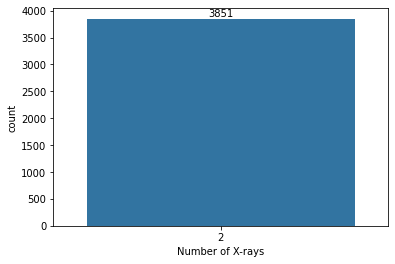

In [ ]:
cplot = sns.countplot(df['Patient_ID'].value_counts())
for container in cplot.containers:
    cplot.bar_label(container)
cplot.set(xlabel='Number of X-rays')
plt.show()

In [ ]:
df2 = pd.DataFrame(columns=['Patient_ID','Image_file1','Image_file2','Report_ID','Comparison','Indication','Findings','Impression'])

In [ ]:
ev_plist=df['Patient_ID'].index.tolist()
ev_plist = [i for i in ev_plist if not (i % 2 != 0)]
ev_plist

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

In [ ]:
odd_plist=df['Patient_ID'].index.tolist()
odd_plist = [i for i in odd_plist if not (i % 2 == 0)]
odd_plist

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [ ]:
counter=0
for patient in ev_plist:
    df2.at[counter,'Patient_ID']= df['Patient_ID'][patient]
    counter+=1

In [ ]:
counter2=0
for img1 in ev_plist:
    df2.at[counter2,'Image_file1']= df['Image_file'][img1]
    counter2+=1
    
    

In [ ]:
counter3=0
for img2 in odd_plist:
    df2.at[counter3,'Image_file2']= df['Image_file'][img2]
    counter3+=1

In [ ]:
df2

,Patient_ID,Image_file1,Image_file2,Report_ID,Comparison,Indication,Findings,Impression
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,NaN,NaN,NaN,NaN,NaN
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,NaN,NaN,NaN,NaN,NaN
2,CXR3,CXR3_IM-1384-1001.png,CXR3_IM-1384-2001.png,NaN,NaN,NaN,NaN,NaN
3,CXR4,CXR4_IM-2050-2001.png,CXR4_IM-2050-1001.png,NaN,NaN,NaN,NaN,NaN
4,CXR5,CXR5_IM-2117-1004003.png,CXR5_IM-2117-1003002.png,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3846,CXR3995,CXR3995_IM-2046-2001.png,CXR3995_IM-2046-1001.png,NaN,NaN,NaN,NaN,NaN
3847,CXR3996,CXR3996_IM-2047-3001.png,CXR3996_IM-2047-1001.png,NaN,NaN,NaN,NaN,NaN
3848,CXR3997,CXR3997_IM-2048-1001.png,CXR3997_IM-2048-1002.png,NaN,NaN,NaN,NaN,NaN
3849,CXR3998,CXR3998_IM-2048-1002.png,CXR3998_IM-2048-1001.png,NaN,NaN,NaN,NaN,NaN


In [ ]:
for filename in os.listdir(r'/content/drive/MyDrive/Project Data/ecgen-radiology'):
    start = open(os.path.join(r'/content/drive/MyDrive/Project Data/ecgen-radiology', filename))
    cursor = start.read()
    search = BeautifulSoup(cursor,'xml')
    heads = search.find_all('AbstractText')
    uid = search.find_all('uId')
    comp = heads[0].get_text()
    ind = heads[1].get_text()  
    find = heads[2].get_text()
    impr = heads[3].get_text()
    num = uid[0]
    id = str(num)
    uniq = id[9:-3]
    if len(df2['Patient_ID'][df2['Patient_ID']==uniq].index)!=0:
        ix= df2['Patient_ID'][df2['Patient_ID']==uniq].index[0]
        df2.at[ix,'Comparison']= comp
        df2.at[ix,'Indication']= ind
        df2.at[ix,'Findings']= find
        df2.at[ix,'Impression']= impr
        df2.at[ix,'Report_ID']= filename
        
    else:
        continue
    
 

In [ ]:
df2

,Patient_ID,Image_file1,Image_file2,Report_ID,Comparison,Indication,Findings,Impression
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,1.xml,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,2.xml,None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,CXR3,CXR3_IM-1384-1001.png,CXR3_IM-1384-2001.png,3.xml,,"rib pain after a XXXX, XXXX XXXX steps this XX...",,"No displaced rib fractures, pneumothorax, or p..."
3,CXR4,CXR4_IM-2050-2001.png,CXR4_IM-2050-1001.png,4.xml,None available,XXXX-year-old XXXX with XXXX.,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,CXR5,CXR5_IM-2117-1004003.png,CXR5_IM-2117-1003002.png,5.xml,,Chest and nasal congestion.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,CXR3995,CXR3995_IM-2046-2001.png,CXR3995_IM-2046-1001.png,3995.xml,"XXXX, XXXX.","Nausea, vomiting x2 weeks. Dialysis patient.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,CXR3996,CXR3996_IM-2047-3001.png,CXR3996_IM-2047-1001.png,3996.xml,None.,,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,CXR3997,CXR3997_IM-2048-1001.png,CXR3997_IM-2048-1002.png,3997.xml,None available.,XXXX-year-old male with positive PPD.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,CXR3998,CXR3998_IM-2048-1002.png,CXR3998_IM-2048-1001.png,3998.xml,,tuberculosis positive PPD,,Heart size is normal and the lungs are clear.


In [ ]:

df2.replace('', np.nan, inplace=True)

In [ ]:
df2

,Patient_ID,Image_file1,Image_file2,Report_ID,Comparison,Indication,Findings,Impression
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,1.xml,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,2.xml,None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,CXR3,CXR3_IM-1384-1001.png,CXR3_IM-1384-2001.png,3.xml,NaN,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,"No displaced rib fractures, pneumothorax, or p..."
3,CXR4,CXR4_IM-2050-2001.png,CXR4_IM-2050-1001.png,4.xml,None available,XXXX-year-old XXXX with XXXX.,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,CXR5,CXR5_IM-2117-1004003.png,CXR5_IM-2117-1003002.png,5.xml,NaN,Chest and nasal congestion.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,CXR3995,CXR3995_IM-2046-2001.png,CXR3995_IM-2046-1001.png,3995.xml,"XXXX, XXXX.","Nausea, vomiting x2 weeks. Dialysis patient.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,CXR3996,CXR3996_IM-2047-3001.png,CXR3996_IM-2047-1001.png,3996.xml,None.,NaN,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,CXR3997,CXR3997_IM-2048-1001.png,CXR3997_IM-2048-1002.png,3997.xml,None available.,XXXX-year-old male with positive PPD.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,CXR3998,CXR3998_IM-2048-1002.png,CXR3998_IM-2048-1001.png,3998.xml,NaN,tuberculosis positive PPD,NaN,Heart size is normal and the lungs are clear.


In [ ]:
df2.isnull().sum()

Patient_ID       0
Image_file1      0
Image_file2      0
Report_ID        0
Comparison     599
Indication      86
Findings       514
Impression      31
dtype: int64

In [ ]:
df2

,Patient_ID,Image_file1,Image_file2,Report_ID,Comparison,Indication,Findings,Impression
0,CXR1,CXR1_1_IM-0001-4001.png,CXR1_1_IM-0001-3001.png,1.xml,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,CXR2,CXR2_IM-0652-1001.png,CXR2_IM-0652-2001.png,2.xml,None.,Preop bariatric surgery.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,CXR3,CXR3_IM-1384-1001.png,CXR3_IM-1384-2001.png,3.xml,NaN,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,"No displaced rib fractures, pneumothorax, or p..."
3,CXR4,CXR4_IM-2050-2001.png,CXR4_IM-2050-1001.png,4.xml,None available,XXXX-year-old XXXX with XXXX.,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,CXR5,CXR5_IM-2117-1004003.png,CXR5_IM-2117-1003002.png,5.xml,NaN,Chest and nasal congestion.,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,CXR3995,CXR3995_IM-2046-2001.png,CXR3995_IM-2046-1001.png,3995.xml,"XXXX, XXXX.","Nausea, vomiting x2 weeks. Dialysis patient.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,CXR3996,CXR3996_IM-2047-3001.png,CXR3996_IM-2047-1001.png,3996.xml,None.,NaN,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,CXR3997,CXR3997_IM-2048-1001.png,CXR3997_IM-2048-1002.png,3997.xml,None available.,XXXX-year-old male with positive PPD.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,CXR3998,CXR3998_IM-2048-1002.png,CXR3998_IM-2048-1001.png,3998.xml,NaN,tuberculosis positive PPD,NaN,Heart size is normal and the lungs are clear.


In [ ]:
df2 = df2.dropna(subset=['Impression'])

In [ ]:
df2.isnull().sum()

Patient_ID       0
Image_file1      0
Image_file2      0
Report_ID        0
Comparison     574
Indication      61
Findings       489
Impression       0
dtype: int64

In [ ]:
df2 = df2.sort_index().reset_index(drop=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient_ID   3820 non-null   object
 1   Image_file1  3820 non-null   object
 2   Image_file2  3820 non-null   object
 3   Report_ID    3820 non-null   object
 4   Comparison   3246 non-null   object
 5   Indication   3759 non-null   object
 6   Findings     3331 non-null   object
 7   Impression   3820 non-null   object
dtypes: object(8)
memory usage: 238.9+ KB


In [67]:
df2.to_excel('/content/drive/MyDrive/Project Data/X-ray1.xlsx')

In [68]:
df3=pd.read_excel('/content/drive/MyDrive/Project Data/X-ray1.xlsx')

In [114]:
def view_pat(patient):
    sno = df['Patient_ID'][df['Patient_ID']=='CXR'+ str(patient)].index[0]
    xray1 = Image(os.path.join(r'/content/drive/MyDrive/Project Data/NLMCXR_png', df2['Image_file1'][sno]))
    xray2 = Image(os.path.join(r'/content/drive/MyDrive/Project Data/NLMCXR_png', df2['Image_file2'][sno]))
    display(xray1,'               ',xray2)
    print('\nImpression'+ ''+ ':'+df2['Impression'][sno])
    

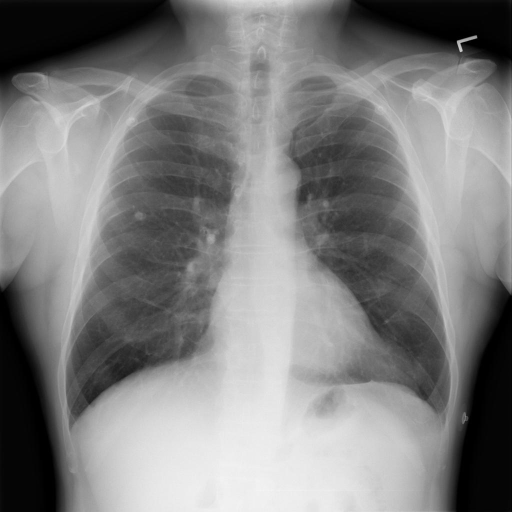

'               '

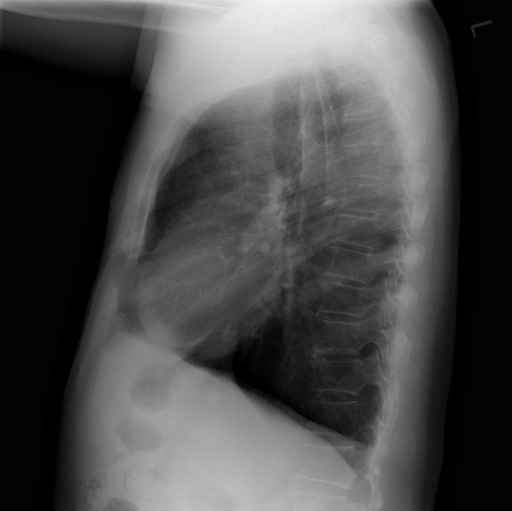


Impression:Increased size of density in the left cardiophrenic XXXX. Primary differential considerations include increased size of prominent epicardial fat, pericardial mass, pleural mass or cardiac aneurysm. CT chest with contrast is recommended. These findings and recommendations were discussed XXXX. XXXX by Dr. XXXX XXXX telephone at XXXX p.m. XXXX/XXXX. Dr. XXXX<XXXX>technologist receipt of the results.


In [115]:
view_pat(5)

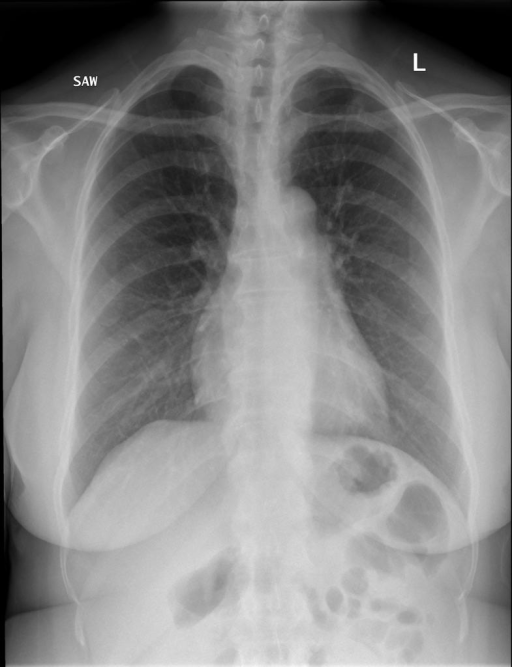

'               '

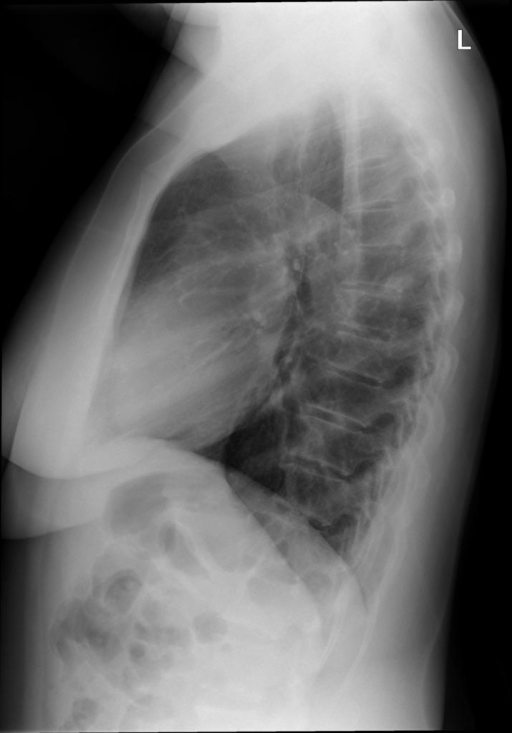


Impression:No evidence of acute cardiopulmonary process. Stable appearance of the chest.


In [116]:
view_pat(10)
